# BUILDING A CONVOLUTIONAL NEURAL NETWORK FROM SCRATCH

_**Building a Convolutional Neural Network (CNN) from Scratch on MNIST dataset and Evaluating its Performance.**_

This experiment uses MNIST dataset that consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [2]:
# Imports required modules and methods

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

2025-02-19 08:40:04.781359: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-19 08:40:04.790404: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-19 08:40:04.880215: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-19 08:40:04.958631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739934605.034581    6654 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739934605.05

## Loading & Analyzing Data

In [3]:
# Loads MNIST dataset
# NOTE: Downloading for the first time may take few minutes to complete

mnist = tf.keras.datasets.mnist.load_data()

In [4]:
# Considering dataset is organized in tuple, items are referenced as follows
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [5]:
# Checks the shape of the datasets

print("Full training set shape:", X_train_full.shape)
print("Test set shape:", X_test.shape)

Full training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [6]:
# Checks the type of the array
X_train_full.dtype

dtype('uint8')

## Preprocessing Data

In [7]:
# As with dtype 'uint8', the data can range from 0 to 255, it transforms the data to fit 
# within a specific range like between 0 and 1, in this case, for effective neural network model training

X_train_full = X_train_full / 255.
X_test = X_test / 255.

In [8]:
# Splits train dataset further with stratification to seperate 5000 instances to be used as validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [9]:
# To match the input shape requirement of the CNN model, a channel dimention gets added to each dataset

X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [10]:
# Checks for the updated shape
X_train.shape

(55000, 28, 28, 1)

## Modeling

**NOTE:** To make it possible to train the model on CPU and within permitted timeline in an classroom setting, the model complexity was kept low by setting relatively lesser number of outputs in the hidden layers. The below model's prediction performance can be improved to an extent by setting more number of outputs in those layers, but in this case, the training should be over accelerated hardware such as GPU(s) to complete training faster.

In [11]:
# Sets the global random seed for operations that rely on a random seed
tf.random.set_seed(42)

# Creates CNN model by having convoluted, pooling, dropout and dense layer in the specified order for this experiment.
# Each convoluted layer is further initialized with specific kernel size, padding, activation and initialization.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Sets the model optimizer and compiles it with specific loss function and metric
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

2025-02-19 08:40:37.462096: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Fits the model with model checkpoint and early stopping configured
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val),
                    callbacks=[
                        # NOTE: Folder "model_weights" must exists under the current working directory
                        tf.keras.callbacks.ModelCheckpoint("./model_weights/my_mnist_model.keras", save_best_only=True),
                        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
                    ])

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8420 - loss: 0.5026 - val_accuracy: 0.9792 - val_loss: 0.0675
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9604 - loss: 0.1365 - val_accuracy: 0.9830 - val_loss: 0.0571
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9682 - loss: 0.1059 - val_accuracy: 0.9874 - val_loss: 0.0520
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9744 - loss: 0.0851 - val_accuracy: 0.9874 - val_loss: 0.0485
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9777 - loss: 0.0755 - val_accuracy: 0.9878 - val_loss: 0.0505
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9791 - loss: 0.0658 - val_accuracy: 0.9850 - val_loss: 0.0533
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9806 - loss: 0.0620 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9823 - los

In [13]:
# Saves the trained model for later reference
# NOTE: Make sure the folder "models" exists under the current working directory

model.save("./models/my_mnist_cnn_model.keras")

### Performance Analysis
Visualizes the learning progress and finally evaluates model's performance on test set

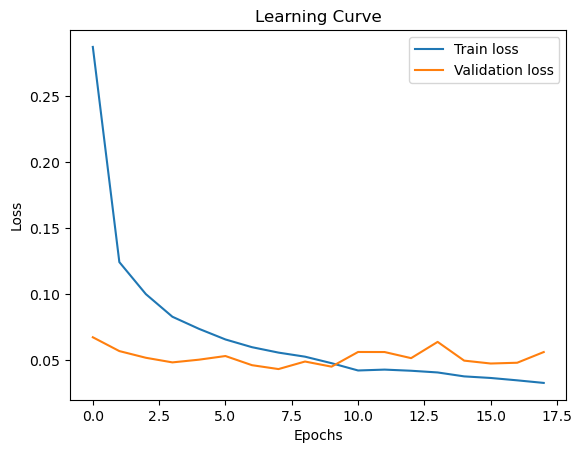

In [14]:
# Plots losses over training iterations [also know as learning curve] of the above model

plt.plot(history.history["loss"], label="Train loss")            # Plots training losses
plt.plot(history.history["val_loss"], label="Validation loss")   # Plots validation losses
plt.xlabel("Epochs")                                             # Plots label for x-axis
plt.ylabel("Loss")                                               # Plots label for y-axis
plt.legend()                                                     # Shows legends
plt.title("Learning Curve")                                      # Prints plot title

plt.show()                                                       # Finally, renders the plot

In [18]:
# Evaluates the model on test set
model_test_performance = model.evaluate(X_test, y_test)

print("Test Performance [Accuracy]: {:.1f}%".format(model_test_performance[1] * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0387
Test Performance [Accuracy]: 99.1%


**Observations:**

- Model training was stopped after 17th epochs considering no improvement over previous best performance for specified number of training iterations (epochs).

- The best validation performance was observed during 7th ecochs and the model started overfitting beyond that.

- The test set performance by the best model was 99.1%.

